<a href="https://colab.research.google.com/github/ayush9h/PyTorch-DeepLearning/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sympy

In [1]:
from sympy import *
import numpy as np

x = symbols('x')

def base_eqn(x):
  return cos(2 * pi * x) + x**2
def derv(x):
  return diff(base_eqn(x)), x

In [2]:
print(derv(x))

(2*x - 2*pi*sin(2*pi*x), x)


In [3]:
def fx(x):
  return np.cos(2*np.pi*x) + x**2

def deriv(x):
  return -2*np.pi*np.sin(2*np.pi*x) + 2 * x

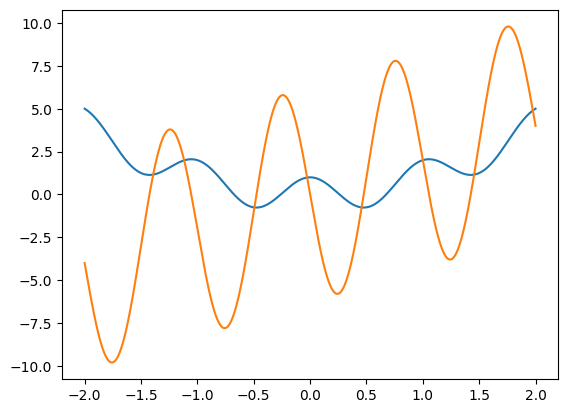

In [4]:
X = np.linspace(-2,2,2001)

import matplotlib.pyplot as plt

plt.plot(X, fx(X))
plt.plot(X, deriv(X))

In [13]:
# localmin = np.random.choice(X,1)
localmin = np.array([0])

learning_rate = 0.01
training_epochs = 100

for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad


print(localmin)


# This is called vanishing gradient problem(zero learning)

[0.]


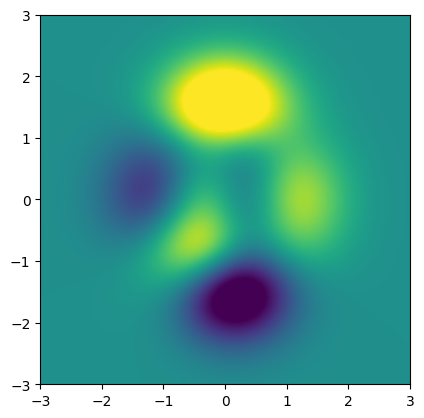

In [14]:
def peaks(x,y):
  x,y = np.meshgrid(x,y)

  z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
      - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
      - 1/3*np.exp(-(x+1)**2 - y**2)
  return z



x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = peaks(x,y)

plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.show()

In [15]:
sx,sy = symbols('sx,sy')

sZ = 3*(1-sx)**2 * exp(-(sx**2) - (sy+1)**2) \
      - 10*(sx/5 - sx**3 - sy**5) * exp(-sx**2-sy**2) \
      - 1/3*exp(-(sx+1)**2 - sy**2)


df_x = lambdify( (sx,sy),diff(sZ,sx),'sympy' )
df_y = lambdify( (sx,sy),diff(sZ,sy),'sympy' )

df_x(1,1).evalf()

-1.07369833656079

In [18]:
localmin = np.random.rand(2)*4-2
startpnt = localmin[:]


learning_rate = .01
training_epochs = 1000


trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = np.array([ df_x(localmin[0],localmin[1]).evalf(),
                    df_y(localmin[0],localmin[1]).evalf()
                  ])
  localmin = localmin - learning_rate*grad
  trajectory[i,:] = localmin


print(localmin)
print(startpnt)

[0.228278920556369 -1.62553495750000]
[-0.68969194 -1.9699124 ]


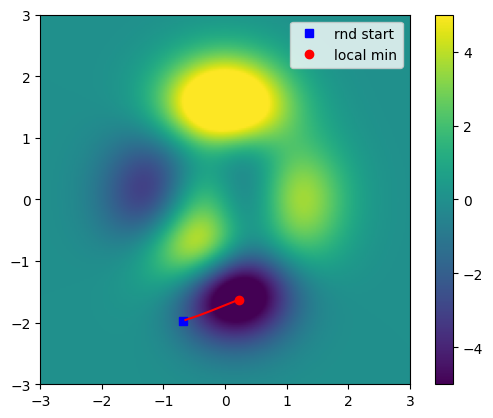

In [19]:
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local min'])
plt.colorbar()
plt.show()

In [ ]:
'''
Learning rate should be smaller when we are closer to the solution
and larger when we are away from the solution


lr = lr * np.abs(grad)
lr = lr * (1 - i + 1 / training_epochs)

'''

